In [64]:
from sklearn.datasets import fetch_openml
import numpy as np
mnist = fetch_openml('mnist_784', as_frame=False)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [65]:
X,y = mnist.data , mnist.target
print(X.shape)
print(y.shape)

(70000, 784)
(70000,)


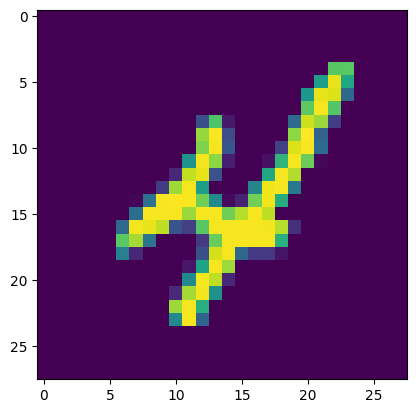

In [94]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd

some_digit = X[9]
some_digit_image = some_digit.reshape(28, 28)
plt.imshow(some_digit_image)
plt.show()


In [91]:
y[9]


4

In [71]:
y = y.astype(np.uint8)
print(y)

[5 0 4 ... 4 5 6]


In [72]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]


## TRAIN Binary Classifier

In [73]:
y_train_5 = (y_train == 5) # True for all 5s, False for all other digits.
y_test_5 = (y_test == 5)

In [74]:
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(random_state=42)

In [75]:
sgd_clf.predict([some_digit])

array([ True])

## Implementing Cross Validation

In [77]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf,X_train,y_train_5,cv=3,scoring="accuracy")

array([0.95035, 0.96035, 0.9604 ])

In [80]:
from sklearn.base import BaseEstimator

class Never5Classifier(BaseEstimator):
    def fit(self,X,y=None):
        pass
    def predict(self, X):
        return np.zeros((len(X),1),dtype=bool)

In [81]:
never_5_clf = Never5Classifier()
cross_val_score(never_5_clf,X_train,y_train_5,cv=3,scoring="accuracy")

array([0.91125, 0.90855, 0.90915])

## Confusion Matrix

In [82]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf,X_train,y_train_5,cv=3)

In [83]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_5,y_train_pred)

array([[53892,   687],
       [ 1891,  3530]], dtype=int64)

In [84]:
y_train_perfect_predicitions = y_train_5
confusion_matrix(y_train_5, y_train_perfect_predicitions)

array([[54579,     0],
       [    0,  5421]], dtype=int64)

## Precision and Recall 

In [85]:
from sklearn.metrics import precision_score , recall_score
precision_score(y_train_5 , y_train_pred)

0.8370879772350012

In [86]:
recall_score(y_train_5,y_train_pred)

0.6511713705958311

In [87]:
from sklearn.metrics import f1_score
f1_score(y_train_5, y_train_pred)

0.7325171197343846